# Import library

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,accuracy_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
seed =45
% matplotlib inline

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import data set

In [2]:
#path = '../input/'
path = ''
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


# Explore data set

In [4]:
train.head(3).T

,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


# Target varaiable

0    573518
1     21694
Name: target, dtype: int64

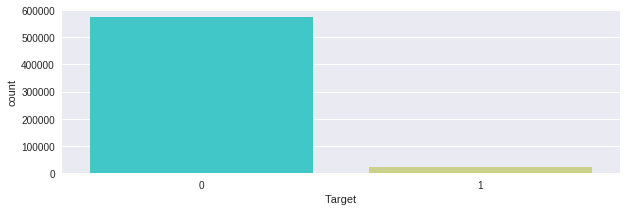

In [3]:
plt.figure(figsize=(10,3))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

train['target'].value_counts()

The 'target' variable in imbalanced 

# CORELATION PLOT

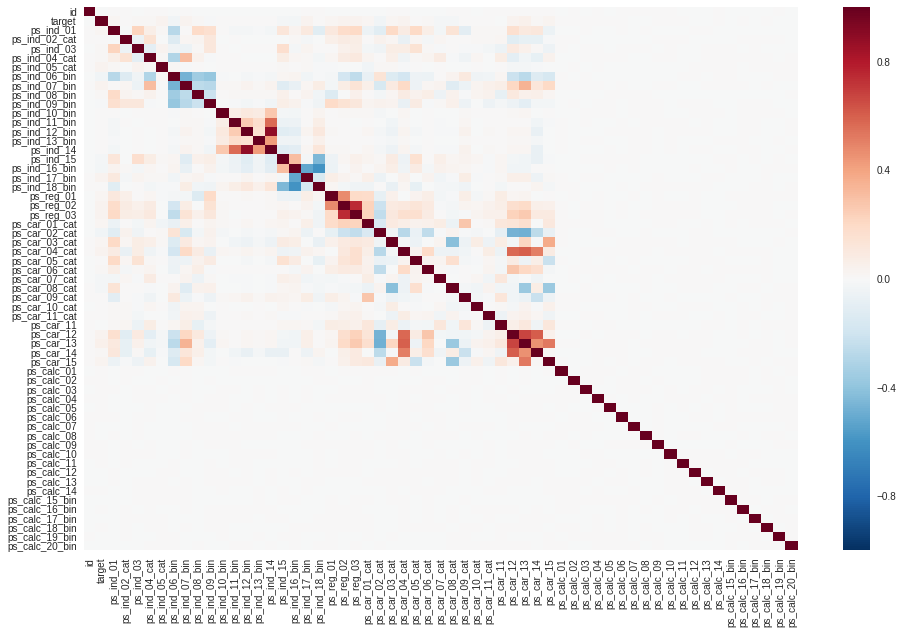

In [4]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

#  ps calc  *  value as 0 relation with remaining varialble

In [3]:
ps_cal = train.columns[train.columns.str.startswith('ps_calc')] 
train = train.drop(ps_cal,axis =1)
test = test.drop(ps_cal,axis=1)
train.shape

(595212, 39)

# Missing value is data set

"""Values of -1 indicate that the feature was missing from the observation. 
The target columns signifies whether or not a claim was filed for that policy holder.""

In [71]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
k

,train,test
id,0,0.0
target,0,NaN
ps_ind_01,0,0.0
ps_ind_02_cat,216,307.0
ps_ind_03,0,0.0
ps_ind_04_cat,83,145.0
ps_ind_05_cat,5809,8710.0
ps_ind_06_bin,0,0.0
ps_ind_07_bin,0,0.0
ps_ind_08_bin,0,0.0


Missing value in test train data set are in same propotion and same column

In [4]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [5]:
missing_value(train)
missing_value(test)

In [8]:
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train)


 Unique value of "id" is "595212" 

 Unique value of "target" is "2" 

 Unique value of "ps_ind_01" is "8" 

 Unique value of "ps_ind_02_cat" is "4" 

 Unique value of "ps_ind_03" is "12" 

 Unique value of "ps_ind_04_cat" is "2" 

 Unique value of "ps_ind_05_cat" is "7" 

 Unique value of "ps_ind_06_bin" is "2" 

 Unique value of "ps_ind_07_bin" is "2" 

 Unique value of "ps_ind_08_bin" is "2" 

 Unique value of "ps_ind_09_bin" is "2" 

 Unique value of "ps_ind_10_bin" is "2" 

 Unique value of "ps_ind_11_bin" is "2" 

 Unique value of "ps_ind_12_bin" is "2" 

 Unique value of "ps_ind_13_bin" is "2" 

 Unique value of "ps_ind_14" is "5" 

 Unique value of "ps_ind_15" is "14" 

 Unique value of "ps_ind_16_bin" is "2" 

 Unique value of "ps_ind_17_bin" is "2" 

 Unique value of "ps_ind_18_bin" is "2" 

 Unique value of "ps_reg_01" is "10" 

 Unique value of "ps_reg_02" is "19" 

 Unique value of "ps_reg_03" is "5012" 

 Unique value of "ps_car_01_cat" is "12" 

 Unique value of "ps_car

###### The unique value of "ps_car_11_cat" is maximum in the data set is 104

In [7]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [8]:
cat_col = [col for col in train.columns if '_cat' in col]
print(cat_col)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


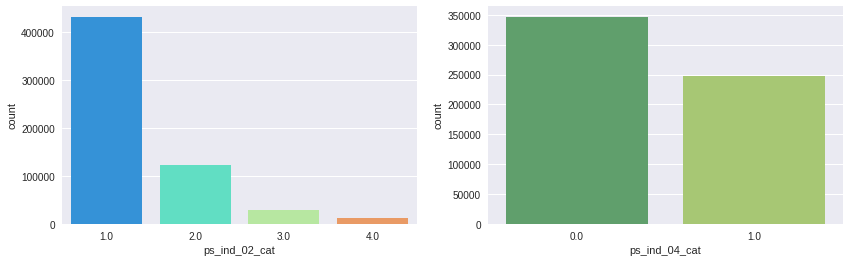

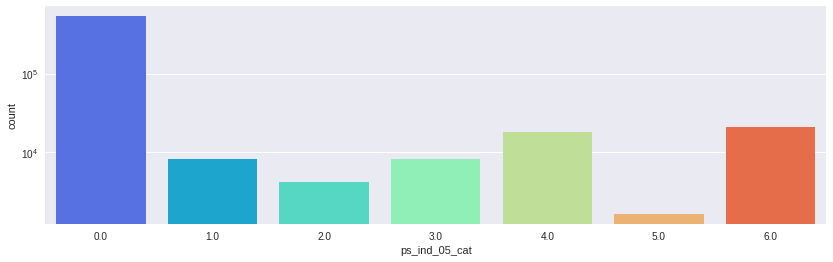

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(14,4))
ax1,ax2, = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,4))
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax)
ax.set_yscale('log')

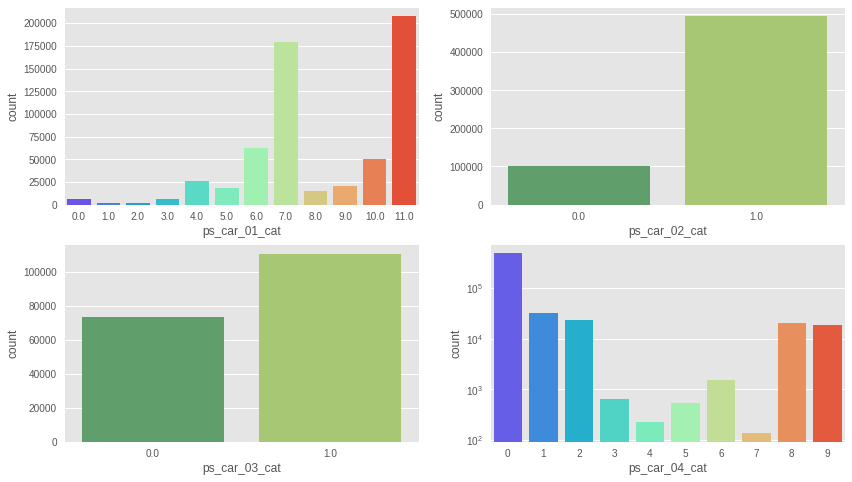

In [192]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax4)
ax4.set_yscale('log')

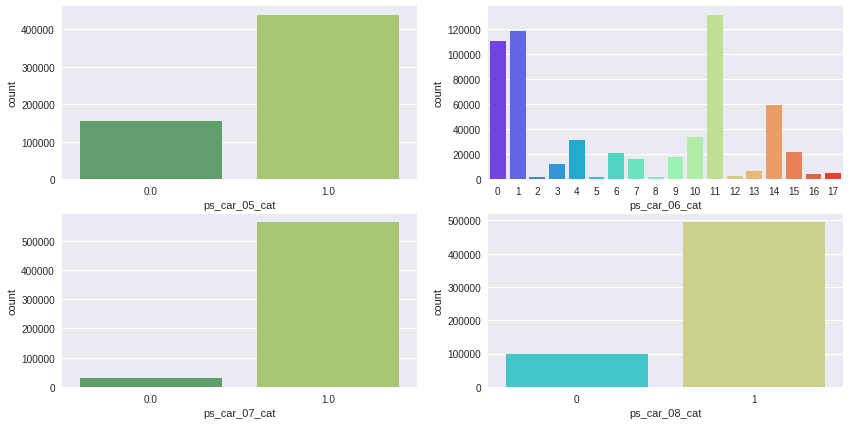

In [21]:
fig,ax = plt.subplots(2,2,figsize = (14,7))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax4)


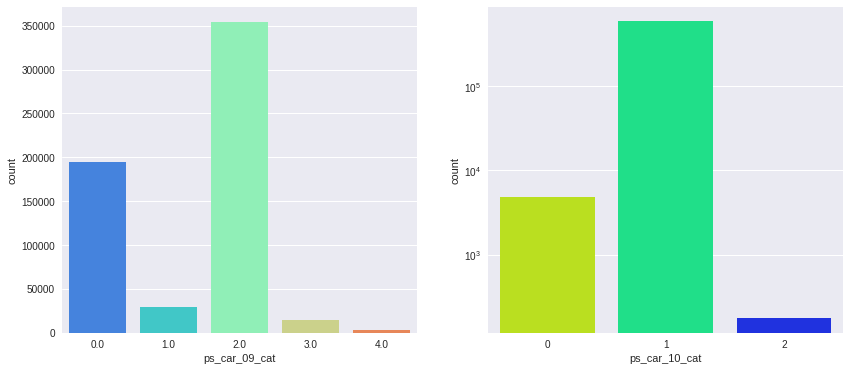

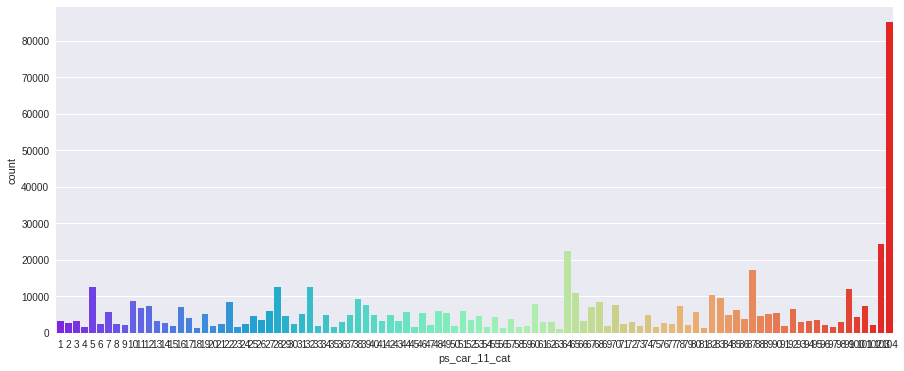

In [102]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
ax2.set_yscale('log')
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax)

In [9]:
bin_col = [col for col in train.columns if 'bin' in col]
print(bin_col)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']


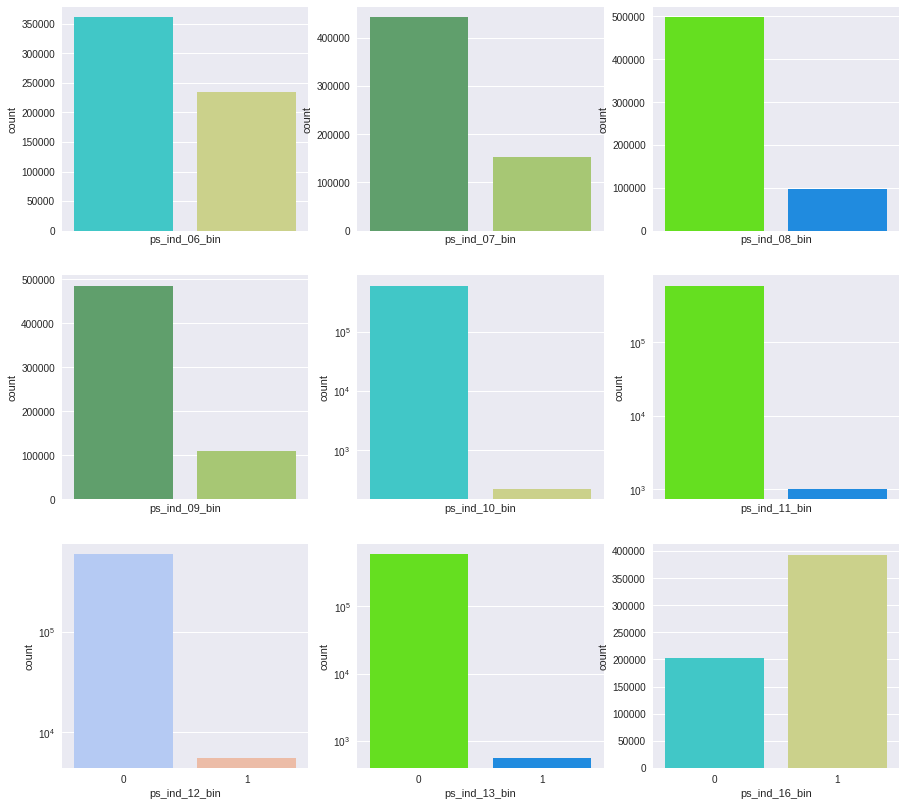

In [100]:
fig,ax = plt.subplots(3,3,figsize=(15,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(train['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(train['ps_ind_10_bin'],palette='rainbow',ax=ax5)
ax5.set_yscale('log')
sns.countplot(train['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
ax6.set_yscale('log')
sns.countplot(train['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
ax7.set_yscale('log')
sns.countplot(train['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
ax8.set_yscale('log')
sns.countplot(train['ps_ind_16_bin'],palette='rainbow',ax=ax9)

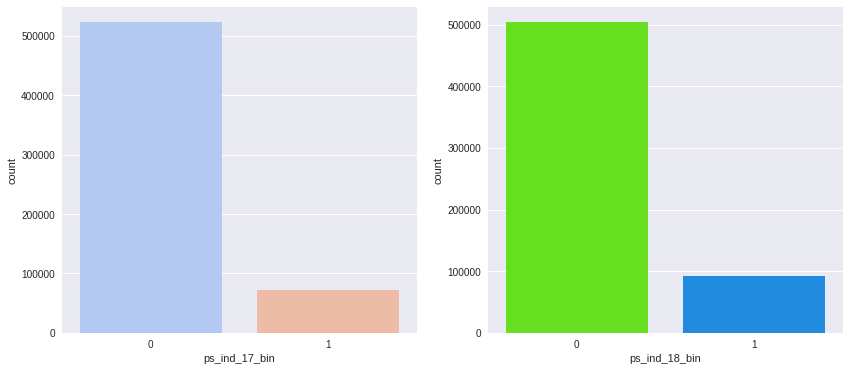

In [99]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_ind_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(train['ps_ind_18_bin'],palette='gist_rainbow',ax=ax2)

In [10]:
tot_cat_col = list(train.select_dtypes(include=['category']).columns)

other_cat_col = [c for c in tot_cat_col if c not in cat_col+ bin_col]
other_cat_col

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_15']

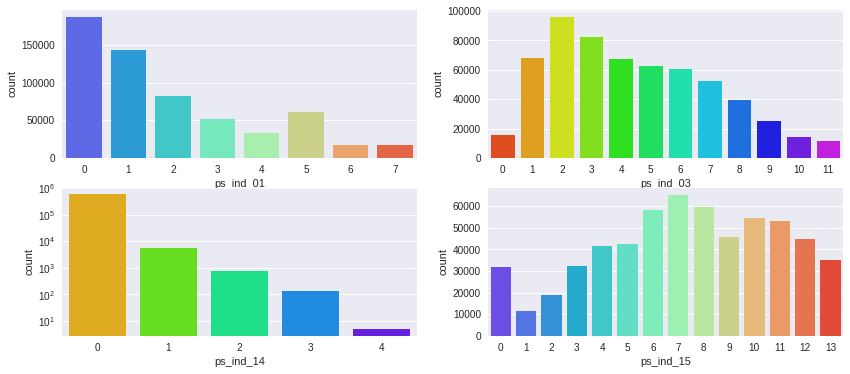

In [97]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=train,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
ax3.set_yscale('log')
sns.countplot(data=train,x='ps_ind_15',palette='rainbow',ax=ax4)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

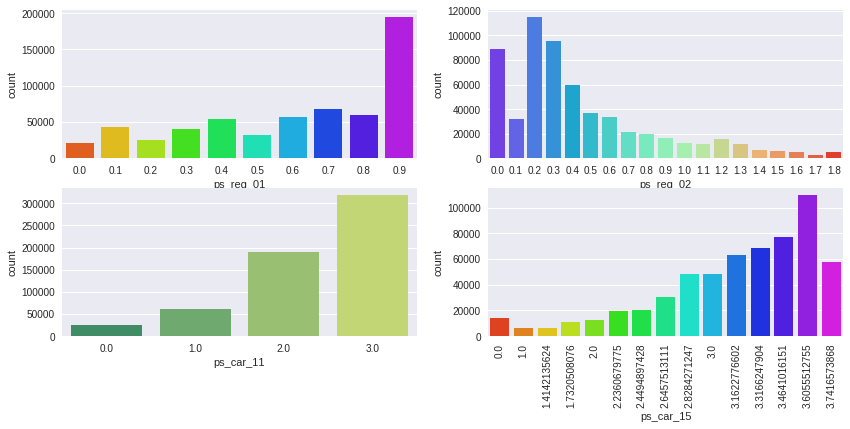

In [114]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 =ax.flatten()
sns.countplot(data=train,x='ps_reg_01',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='ps_reg_02',palette='rainbow',ax=ax2)
sns.countplot(data=train,x='ps_car_11',palette='summer',ax=ax3)
sns.countplot(data=train,x='ps_car_15',palette='gist_rainbow',ax=ax4)
plt.xticks(rotation=90)

In [11]:
num_col = [c for c in train.columns if c not in tot_cat_col]
num_col.append('ps_car_15')
train['ps_car_15'] = train['ps_car_15'].astype('float32')
test['ps_car_15'] = test['ps_car_15'].astype('float32')
num_col.remove('id')
num_col

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [12]:
train['ps_reg_03'].describe()

count    595212.000000
mean          0.846950
std           0.328237
min           0.061237
25%           0.633936
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

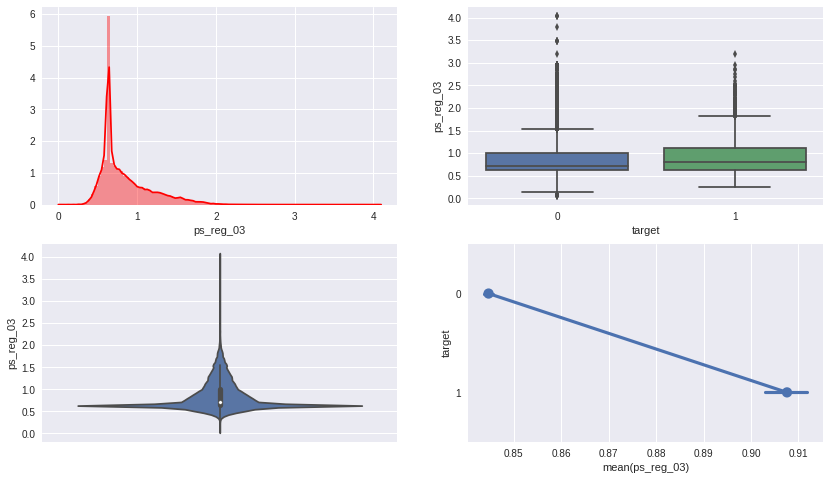

In [17]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train,ax=ax4)

ps_reg_03 has outlier data points

In [16]:
train['ps_car_12'].describe()

count    595212.000000
mean          0.379947
std           0.058300
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64

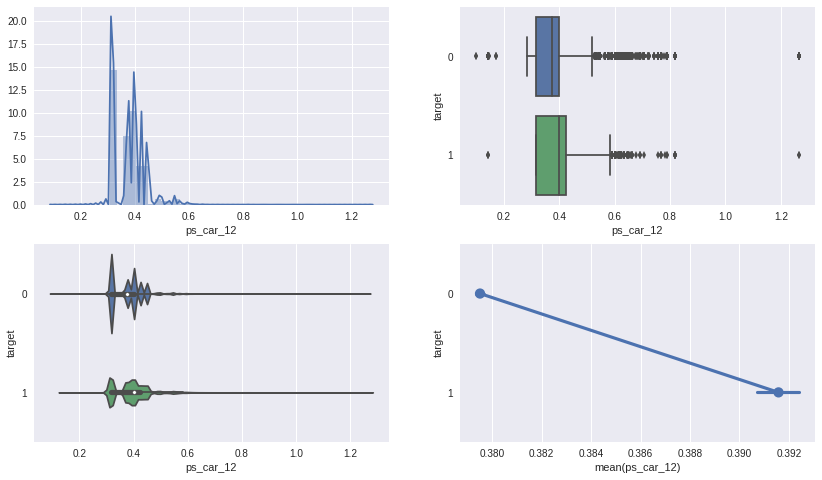

In [35]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_12'],bins=50,ax=ax1)
sns.boxplot(x='ps_car_12',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_12',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_12',y='target',data=train,ax=ax4)

In [31]:
train['ps_car_13'].describe()

count    595212.000000
mean          0.813265
std           0.224588
min           0.250619
25%           0.670867
50%           0.765811
75%           0.906190
max           3.720626
Name: ps_car_13, dtype: float64

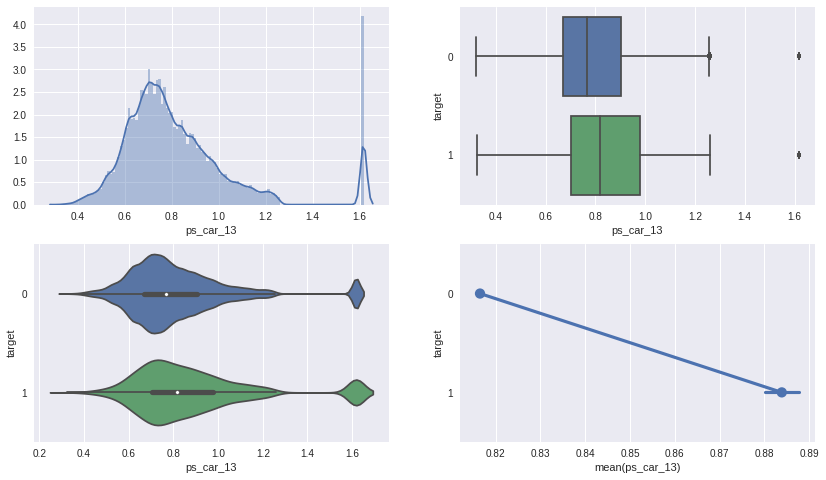

In [58]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_13'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_13',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_13',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_13',y='target',data=train,ax=ax4)

In [37]:
train['ps_car_14'].describe()

count    595212.000000
mean          0.373748
std           0.044078
min           0.109545
25%           0.353553
50%           0.368782
75%           0.396485
max           0.636396
Name: ps_car_14, dtype: float64

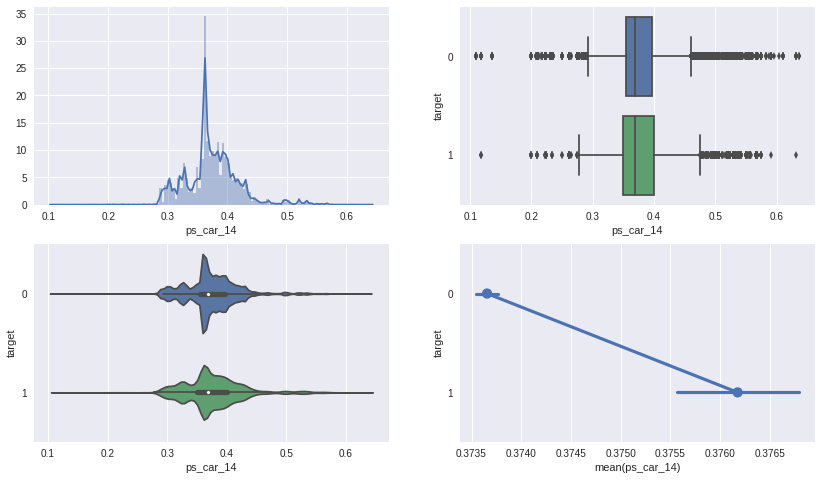

In [47]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_14'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_14',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_14',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_14',y='target',data=train,ax=ax4)

# Co relation plot

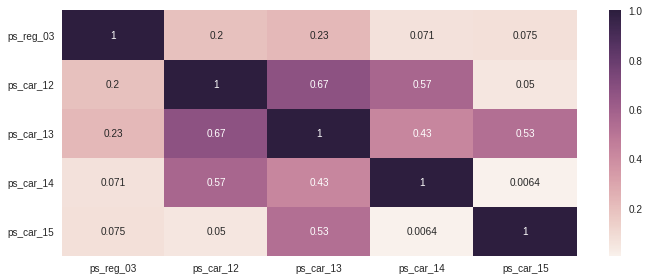

In [12]:
cor = train[num_col].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

In [13]:
#Final categorical columns to be consider
tot_cat_col.remove('ps_car_15')
tot_cat_col.remove('target')
train['ps_car_15'] = train['ps_car_15'].astype('float32')

# Determine outliers in dataset

In [6]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(lower_bound,upper_bound)
        print(quartile_f,quartile_l)
        
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
num_col = ['ps_reg_03', 'ps_car_13', 'ps_car_14']
outlier(train,num_col)

0.08484029175 1.54909582495
0.4183300133 1.8521946442
0.31788087655

/home/sudhir/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 1.25917611615
0.448300509774 1.61761689551
0.2891566485 0.4608812941
0.2887905816 0.5234500931


# Split data set

In [7]:
X = train.drop(['target','id'],axis=1)
y = train['target']
x_test = test.drop('id',axis=1)

# Light GBM model

In [8]:
def runLGB(train,valid,y_train,y_valid,test,eta=0.5,num_rounds=10,early_stop=50,max_depth=5):
    
    param = {
            'objective':'binary',
            'boosting':'gbdt',
            'learning_rate':eta,            
            'metric':'auc',
            'bagging_fraction':0.7,
            #'bagging_freq':5,
            'bagging_seed':seed,
            'num_leaves':50,
            'feature_fraction':0.7,
            #'verbose':10,            
            'min_child_weight':6,
            'max_depth':max_depth,
            'reg_alpha':1.5, 
            'reg_lambda':5,
            'scale_pos_weight':9
        
            #'nthread':-1           
            }
   
    lgtrain = lgb.Dataset(train,label=y_train)
    lgvalid = lgb.Dataset(valid,label=y_valid)
    
    model=lgb.train(param,lgtrain,num_rounds,valid_sets=lgvalid,
              early_stopping_rounds=early_stop,verbose_eval=50 )
    #lg_pred = model.predict(xvl,num_iteration=model.best_iteration)
    pred = model.predict(test,num_iteration=model.best_iteration)    
    return pred,model

In [9]:
#Kfold
kf = StratifiedKFold(n_splits =5,random_state=seed,shuffle=True)
pred_test_full=0
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    
    pred_test,lg_model = runLGB(xtr,xvl,ytr,yvl,x_test,eta=0.1,num_rounds=500,max_depth=5)
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.636752
[100]	valid_0's auc: 0.638404
[150]	valid_0's auc: 0.637407
Early stopping, best iteration is:
[101]	valid_0's auc: 0.638585
2 of KFold 5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.637144
[100]	valid_0's auc: 0.640224
[150]	valid_0's auc: 0.639787
Early stopping, best iteration is:
[108]	valid_0's auc: 0.640777
3 of KFold 5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.640868
[100]	valid_0's auc: 0.642423
Early stopping, best iteration is:
[87]	valid_0's auc: 0.64282
4 of KFold 5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.634771
[100]	valid_0's auc: 0.636604
Early stopping, best iteration is:
[86]	valid_0's auc: 0.63716
5 of KFold 5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.6401
[100]	valid_0's auc: 0.644442
[150]	valid_0's 

In [10]:
pred_lgb = pred_test_full/5

# Important Features

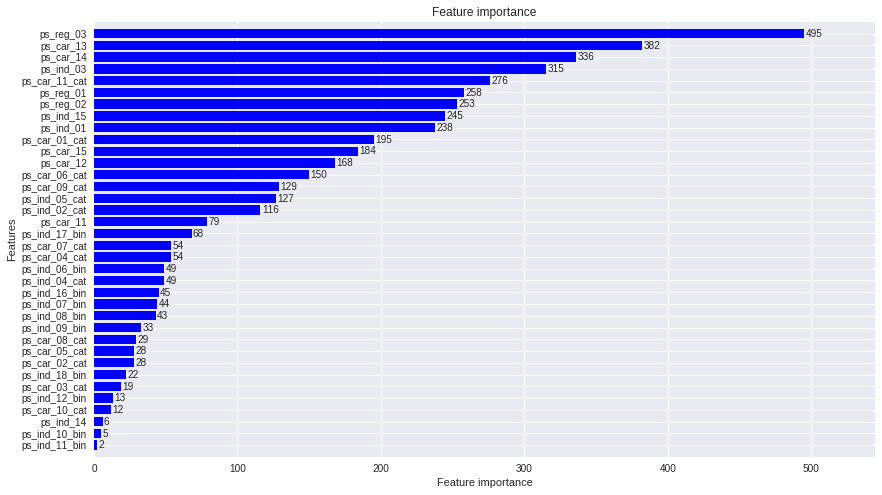

In [11]:
fig,ax = plt.subplots(figsize=(14,8))
lgb.plot_importance(lg_model,height=0.8,max_num_features=None,ax=ax,color='b')
plt.show()

# Predict for unsen data set

In [12]:
y_pred = pred_lgb
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 
#submit.to_csv('lr_porto.csv',index=False) 

# XGBoost

In [29]:
def float_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('float64')
category_type(train)
category_type(test)

In [30]:
X = train.drop(['target','id'],axis=1)
y = train['target']
x_test = test.drop('id',axis=1)

In [13]:
def runXGB(xtrain,xvalid,ytrain,yvalid,xtest,eta=0.1,num_rounds=100,max_depth=4):
    params = {
        'objective':'binary:logistic',        
        'max_depth':max_depth,
        'learning_rate':eta,
        'eval_metric':'auc',
        'min_child_weight':6,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'seed':seed,
        'reg_lambda':1.3,
        'reg_alpha':8,
        'gamma':10,
        'scale_pos_weight':1.6
        #'n_thread':-1
    }
    
    dtrain = xgb.DMatrix(xtrain,label=ytrain)
    dvalid = xgb.DMatrix(xvalid,label=yvalid)
    dtest = xgb.DMatrix(xtest)
    watchlist = [(dtrain,'train'),(dvalid,'test')]
    
    model = xgb.train(params,dtrain,num_rounds,watchlist,early_stopping_rounds=50,verbose_eval=50)
    pred = model.predict(dvalid,ntree_limit=model.best_ntree_limit)
    pred_test = model.predict(dtest,ntree_limit=model.best_ntree_limit)
    return pred_test,model
    

In [14]:
kf = StratifiedKFold(n_splits=5,random_state=seed)
pred_test_full =0
cv_score = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    pred_test,xg_model = runXGB(xtr,xvl,ytr,yvl,x_test,num_rounds=1000,eta=0.1)    
    pred_test_full += pred_test
    i+=1

1 of KFold 5
[0]	train-auc:0.588935	test-auc:0.588224
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[50]	train-auc:0.642583	test-auc:0.634427
[100]	train-auc:0.653204	test-auc:0.639757
[150]	train-auc:0.657523	test-auc:0.641634
[200]	train-auc:0.660651	test-auc:0.642495
[250]	train-auc:0.663479	test-auc:0.642671
Stopping. Best iteration:
[238]	train-auc:0.662892	test-auc:0.642876

2 of KFold 5
[0]	train-auc:0.592999	test-auc:0.587342
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[50]	train-auc:0.642228	test-auc:0.633138
[100]	train-auc:0.652973	test-auc:0.639575
[150]	train-auc:0.657567	test-auc:0.641475
[200]	train-auc:0.660244	test-auc:0.641985
[250]	train-auc:0.662439	test-auc:0.642301
[300]	train-auc:0.664393	test-auc:0.642401
[350]	train-auc:0.666084	test-auc:0.642597
[400]	train-auc:0.667486	t

In [15]:
pred_xgb = pred_test_full/5

# Important Features

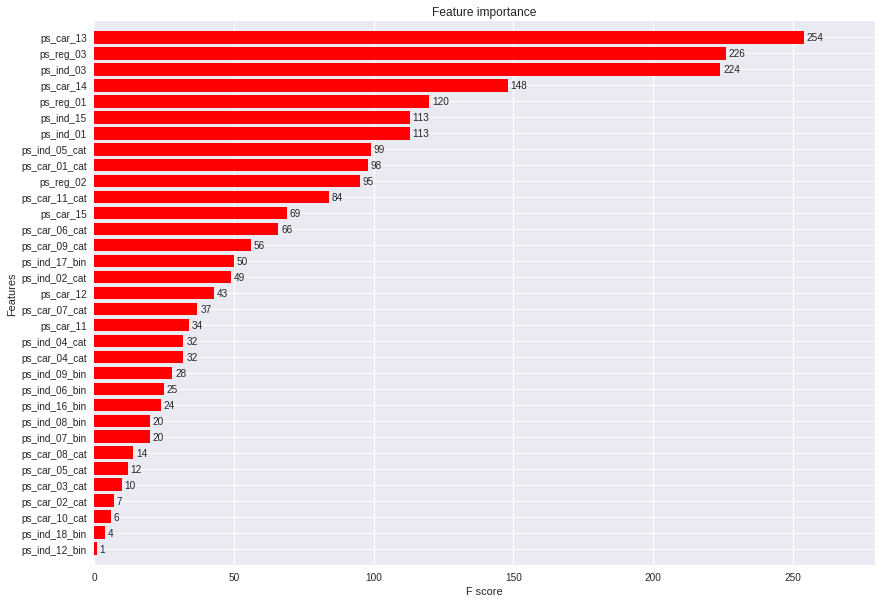

In [16]:
fig,ax = plt.subplots(figsize=(14,10))
xgb.plot_importance(xg_model,ax=ax,height=0.8,color='r')
#plt.tight_layout()
plt.show()

# Predict for unsen data set

In [18]:
y_pred = pred_xgb*0.5+ pred_lgb*0.5
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
#submit.to_csv('lr_porto.csv',index=False)
submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 

# Thank you for visiting